# Dataset Inspection

**This notebook contains python code for dataset inspection. We plot the number of datapoints for each disease & label to inspect the imbalance across diseases.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/CheXpert-v1.0-small/train.csv")
diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

In [3]:
counts = []
for d in diseases:
    count = df[[d]].value_counts()
    count['NaN'] = df[[d]].isna().sum()[0]
    counts.append(count)

In [4]:
df_counts = pd.concat(counts, axis=1)
df_counts.columns = diseases
df_counts.index = ["Positive", "Negative", "Uncertain", "Missing"]
df_counts

/Users/mjhwang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/multi.py:3587: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  uniq_tuples = lib.fast_unique_multiple([self._values, other._values], sort=sort)


,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
Positive,33739,8087,27742,12984,11628
Negative,1328,11116,28097,20726,35396
Uncertain,33376,27000,14783,52246,86187
Missing,154971,177211,152792,137458,90203


## Bar Plot

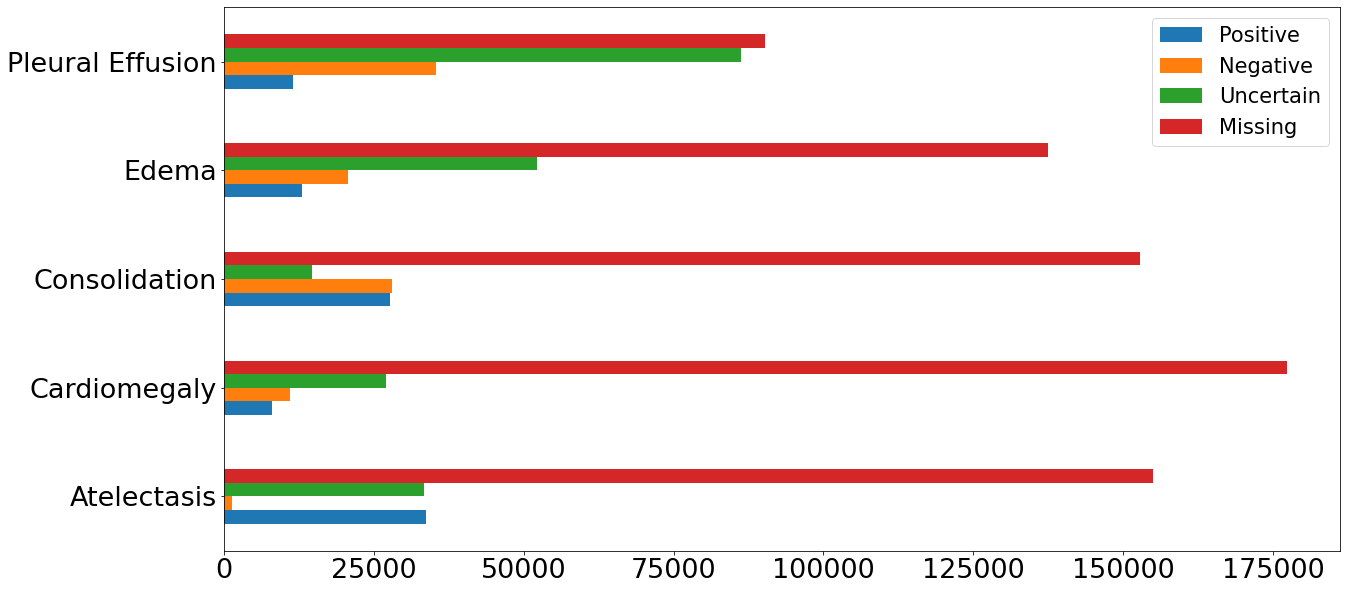

In [5]:
ax1 = df_counts.T.plot.barh(figsize=(20, 10), fontsize=27)
ax1.legend(loc=1,fontsize=21)

## Stacked Bar Plot

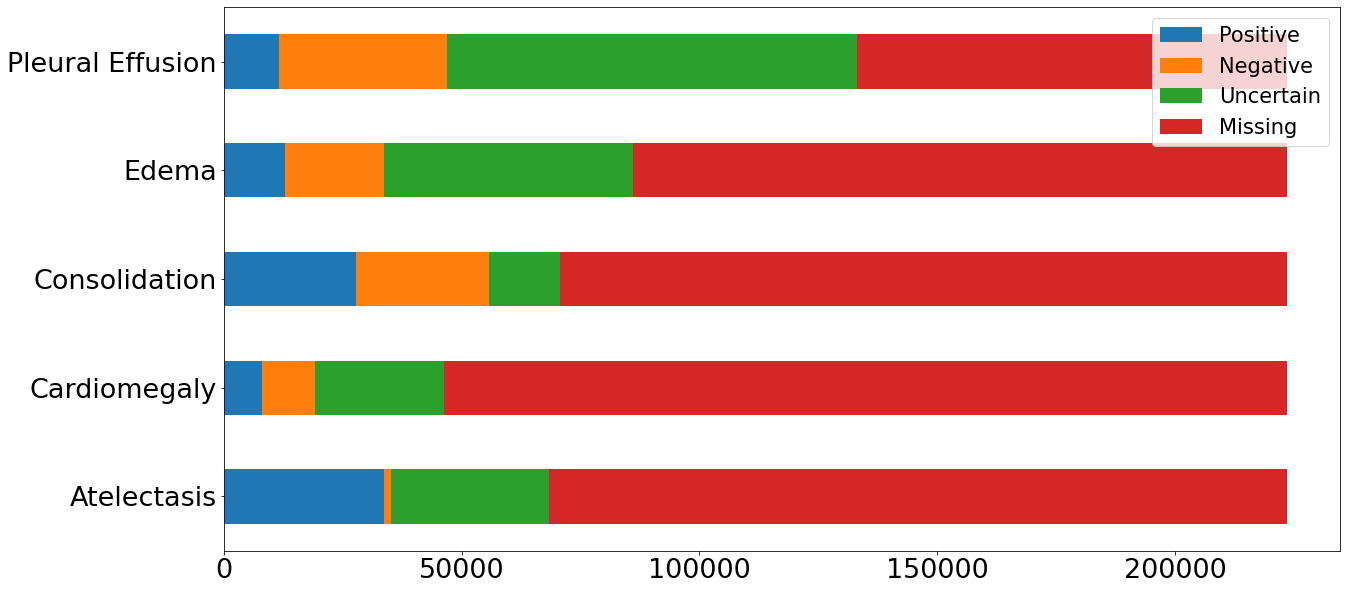

In [6]:
ax1 = df_counts.T.plot.barh(stacked=True, figsize=(20, 10), fontsize=27)
ax1.legend(loc=1,fontsize=21)

## Pie Chart

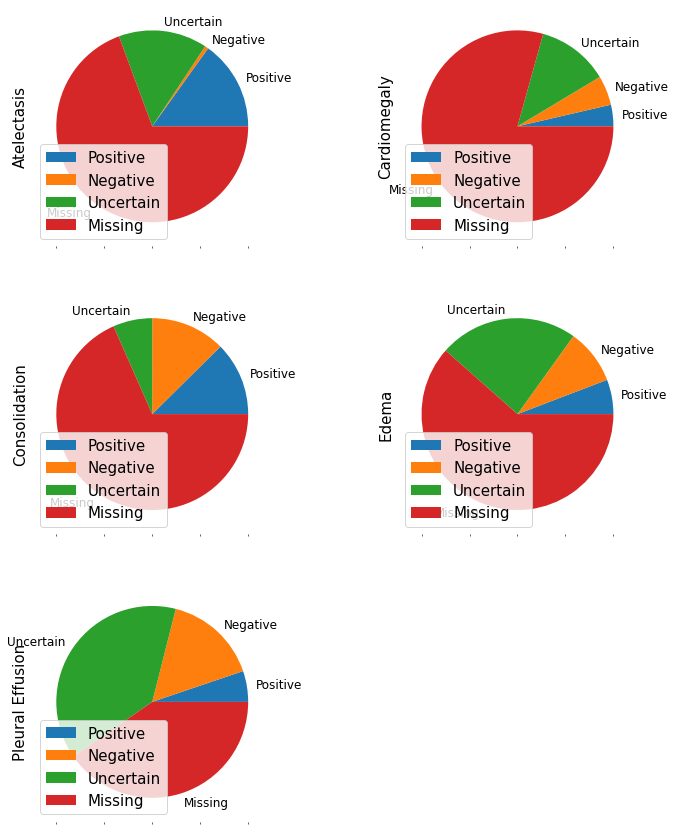

In [7]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15
ax1 = df_counts.plot.pie(subplots=True, layout=(3, 2), figsize=(12, 15), fontsize=12)